In [23]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

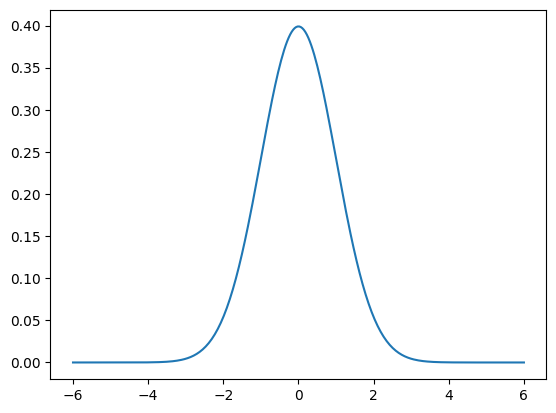

In [24]:
xs = np.linspace(-6,6,300)
normal = stats.norm.pdf(xs)
plt.plot(xs,normal)

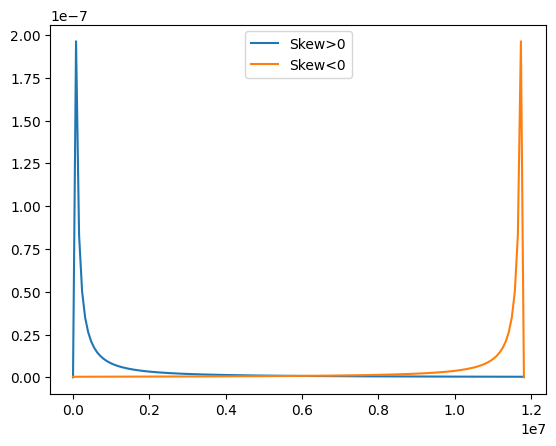

In [ ]:
xs2 = np.linspace(stats.lognorm.ppf(0.01,7,loc=-1),stats.lognorm.ppf(0.99,7,loc=-1),150)

lognormal = stats.lognorm.pdf(xs2,7)
plt.plot(xs2,lognormal,label ='Skew>0')

plt.plot(xs2,lognormal[::-1],label='Skew<0')
plt.legend();

[*********************100%***********************]  1 of 1 completed

Skew: -0.2102203611784854
Mean: 0.0007428052346704447
Median: 0.0007953035404630882


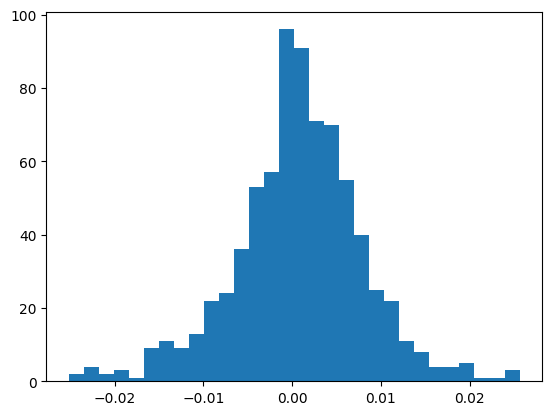

In [41]:
import yfinance as yf

start = '2012-01-01'
end = '2015-01-01'
data = yf.download('SPY',start=start,end=end,auto_adjust=True)
pricing = data['Close']['SPY']
returns= pricing.pct_change()[1:]

print('Skew:',stats.skew(returns))
print('Mean:',np.mean(returns))
print('Median:',np.median(returns))

plt.hist(returns,30);

# 첨도(Kurtosis)

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of Mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.5937628755982794


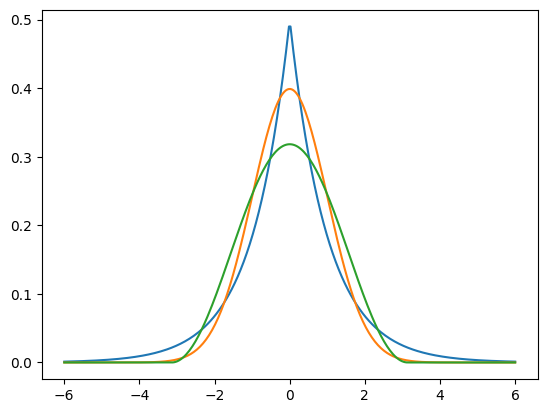

In [45]:
plt.plot(xs,stats.laplace.pdf(xs),label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k')))

plt.plot(xs,normal,label='Mesokurtic (normal)')
print('Excess kurtosis of Mesokurtic distribution:',(stats.norm.stats(moments='k')))

plt.plot(xs,stats.cosine.pdf(xs),label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:',(stats.cosine.stats(moments='k')))

In [46]:
print('Excess kurtosis of returns: ',stats.kurtosis(returns))

Excess kurtosis of returns:  1.2008223492092371


# 4. 정규성 검정: Jarque-Bera (JB) 검정 

In [61]:
from statsmodels.stats.stattools import jarque_bera

N=1000 
M=1000

pvalues = np.ndarray((N))

for i in range(N):
    X = np.random.normal(0,1,M)
    _,pvalue,_,_ = jarque_bera(X) # (검정통계량, p-value, 왜도, 첨도)
    pvalues[i] = pvalue

num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant)/N)

0.049


In [51]:
_,pvalue,_,_ = jarque_bera(returns)

if pvalue > 0.05:
    print('The returns are likely normal.')
else:
    print('The returns are likely not normal.')

The returns are likely not normal.
